In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
# Verify you have installed: cartopy
# using: conda install -c scitools cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
bird_data = pd.read_csv('data/bird_tracking.csv', index_col = 0)
bird_data.head()


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


Text(0, 0.5, 'latitude')

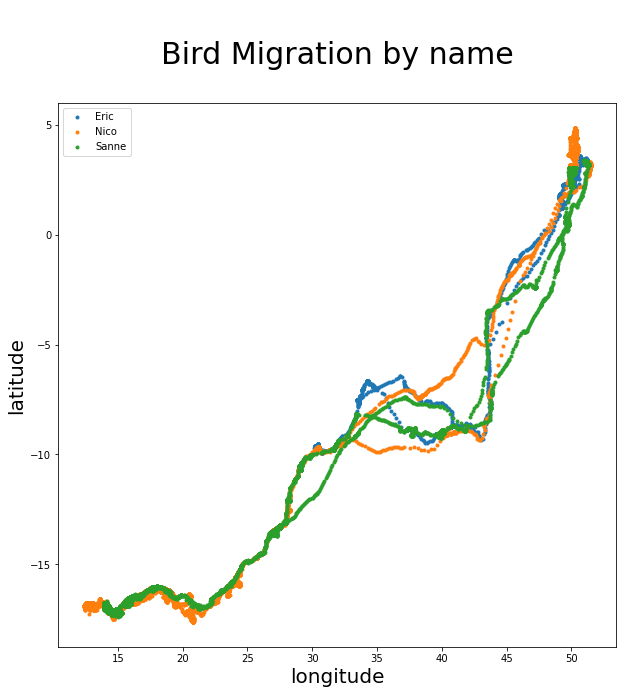

In [3]:
bird_names = pd.unique(bird_data['bird_name'])

plt.figure(figsize=(10,10))

for bird_name in bird_names:
    x , y = bird_data.latitude[ bird_data['bird_name'] == bird_name] , bird_data.longitude[ bird_data['bird_name'] == bird_name]
    plt.plot(x,y, '.',label = bird_name)
plt.title('\nBird Migration by name\n', fontsize=30)    
plt.legend()
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

Plotting histograms

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

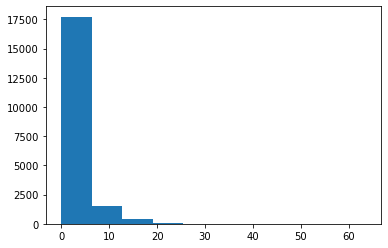

In [4]:
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']
plt.hist(speed)

In [5]:
sum(np.isnan(speed))

85

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

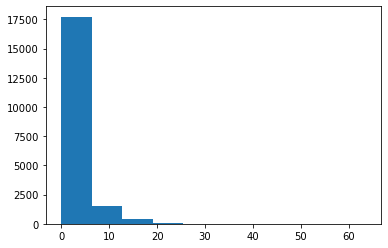

In [6]:
ind = np.isnan(speed)
plt.hist(speed[~ind])

Text(0, 0.5, 'Frequency')

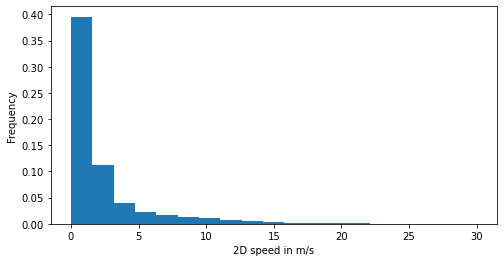

In [7]:
plt.figure(figsize=(8,4))
plt.hist(speed, bins=np.linspace(0, 30, 20), density=True)
plt.xlabel('2D speed in m/s')
plt.ylabel('Frequency')

Text(0.5, 0, '2D speed')

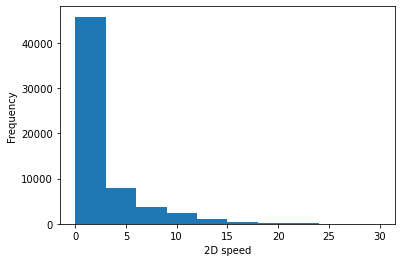

In [8]:
bird_data.speed_2d.plot(kind='hist', range=[0, 30])
plt.xlabel('2D speed')

In [9]:
timestamps = [ datetime.datetime.strptime\
    (bird_data.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S')\
        for k in range(len(bird_data))]

In [10]:
bird_data['timestamps'] = pd.Series(timestamps, index= bird_data.index)

In the video, the example is made for '_Eric_', and since it is the first bird in the dataset, when we use `times[0]` it works, but when used with other _bird name_ it doesn't. So the solution for this is to use: <b>`reset_index()`</b>. (and obviously, assign again to '_times_'. If not, it doesn't work)

In [11]:
times = bird_data.timestamps[bird_data.bird_name == 'Sanne']
times = times.reset_index(drop=True) # additional line of code for
                                     # making the loop posible with
                                     # any bird name.

elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

In [12]:
times[0]

Timestamp('2013-08-15 00:01:08')

In [13]:
elapsed_days
# plt.plot(elapsed_days)

array([0.0, 0.02074074074074074, 0.04179398148148148, ...,
       258.9574537037037, 258.97818287037035, 258.99891203703703],
      dtype=object)

In [14]:
next_day = 1
ind = []
mean=[]
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        ind.append(i)
    else:
        next_day += 1
        mean.append(np.mean(bird_data.speed_2d[ind]))
        #reset indexes to empty list!
        ind = []

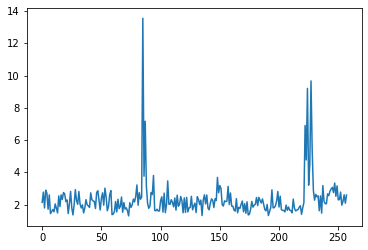

In [15]:
plt.plot(mean)

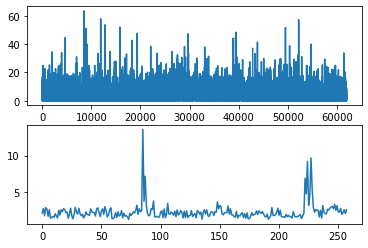

In [71]:
fig, axs = plt.subplots(2,1)

axs[0].plot(bird_data.speed_2d)
axs[1].plot(mean)

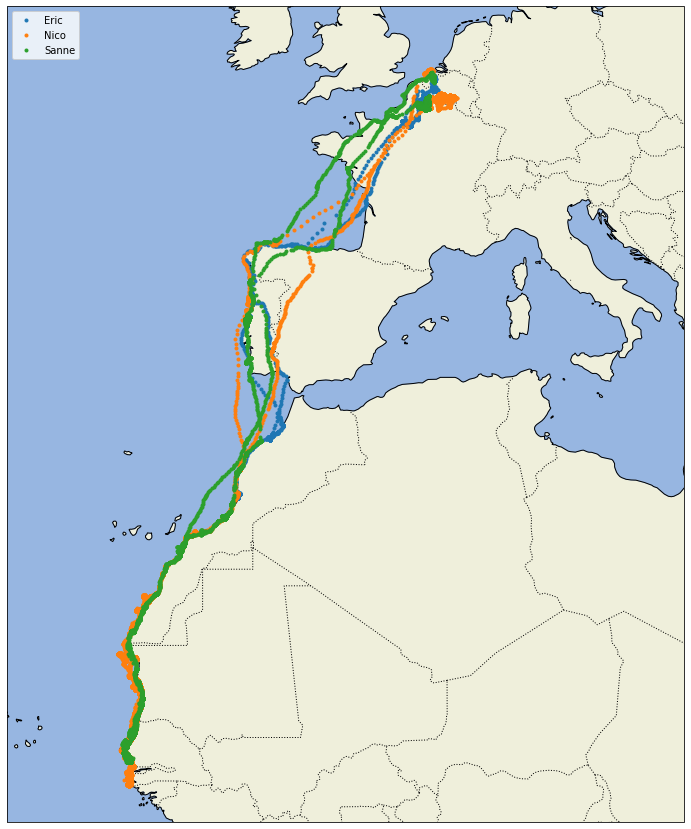

In [19]:
proj = ccrs.Mercator()

plt.figure(figsize=(5,5))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    loc = bird_data['bird_name'] == name 
    x , y = bird_data.longitude[loc] , bird_data.latitude[loc]
    ax.plot(x, y , '.', transform=ccrs.Geodetic(), label = name)

plt.legend(loc="upper left")